*Dialogue Length For Genres*

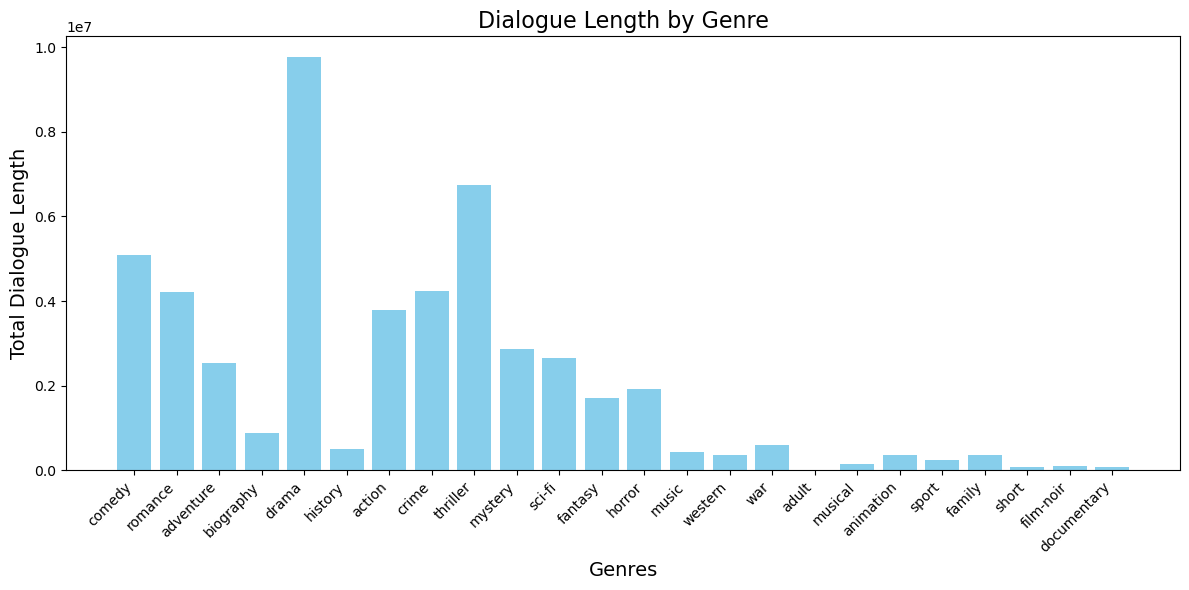

In [5]:
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

# File paths (loaded once)
movie_lines_file = r"D:\archive\movie_lines.txt"
movie_metadata_file = r"D:\archive\movie_titles_metadata.txt"

# Step 1: Parse movie_titles_metadata.txt (Load metadata once)
movie_data = []

try:
    with open(movie_metadata_file, 'r', encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(' +++$+++ ')
            if len(parts) >= 6:  # Ensure there are at least 6 parts (ID, title, year, rating, votes, genres)
                movie_id = parts[0]
                title = parts[1]
                
                # Extract the numeric year (in case of additional information like '/I')
                year_str = parts[2]
                year = int(''.join(filter(str.isdigit, year_str)))  # Extract only digits
                
                rating = float(parts[3])
                votes = int(parts[4])
                genres = ast.literal_eval(parts[5])  # Convert string to list
                
                movie_data.append([movie_id, title, year, rating, votes, genres])

    # Create a DataFrame for metadata
    df = pd.DataFrame(movie_data, columns=['Movie ID', 'Title', 'Year', 'Rating', 'Votes', 'Genres'])

except OSError as e:
    print(f"Error opening file: {e}")
except ValueError as e:
    print(f"Error parsing line: {line} | {e}")

# Step 2: Extract dialogues from movie_lines.txt
movie_dialogues = defaultdict(list)

try:
    with open(movie_lines_file, encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(" +++$+++ ")
            if len(parts) == 5:
                movie_id, dialogue = parts[2], parts[4]
                movie_dialogues[movie_id].append(dialogue)
except UnicodeDecodeError as e:
    print(f"Error reading the file: {e}")
    exit()

# Step 3: Match genres from movie_titles_metadata.txt and calculate total dialogue length by genre
genre_dialogue_lengths = defaultdict(int)

for _, row in df.iterrows():
    movie_id = row['Movie ID']
    genres = row['Genres']
    if movie_id in movie_dialogues:
        total_length = sum(len(d) for d in movie_dialogues[movie_id])
        for genre in genres:
            genre_dialogue_lengths[genre] += total_length

# Step 4: Plot dialogue length by genre
genres = list(genre_dialogue_lengths.keys())
lengths = list(genre_dialogue_lengths.values())

plt.figure(figsize=(12, 6))
plt.bar(genres, lengths, color="skyblue")
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Total Dialogue Length", fontsize=14)
plt.title("Dialogue Length by Genre", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


*Top Genres by Voting and IMDB Ranking*

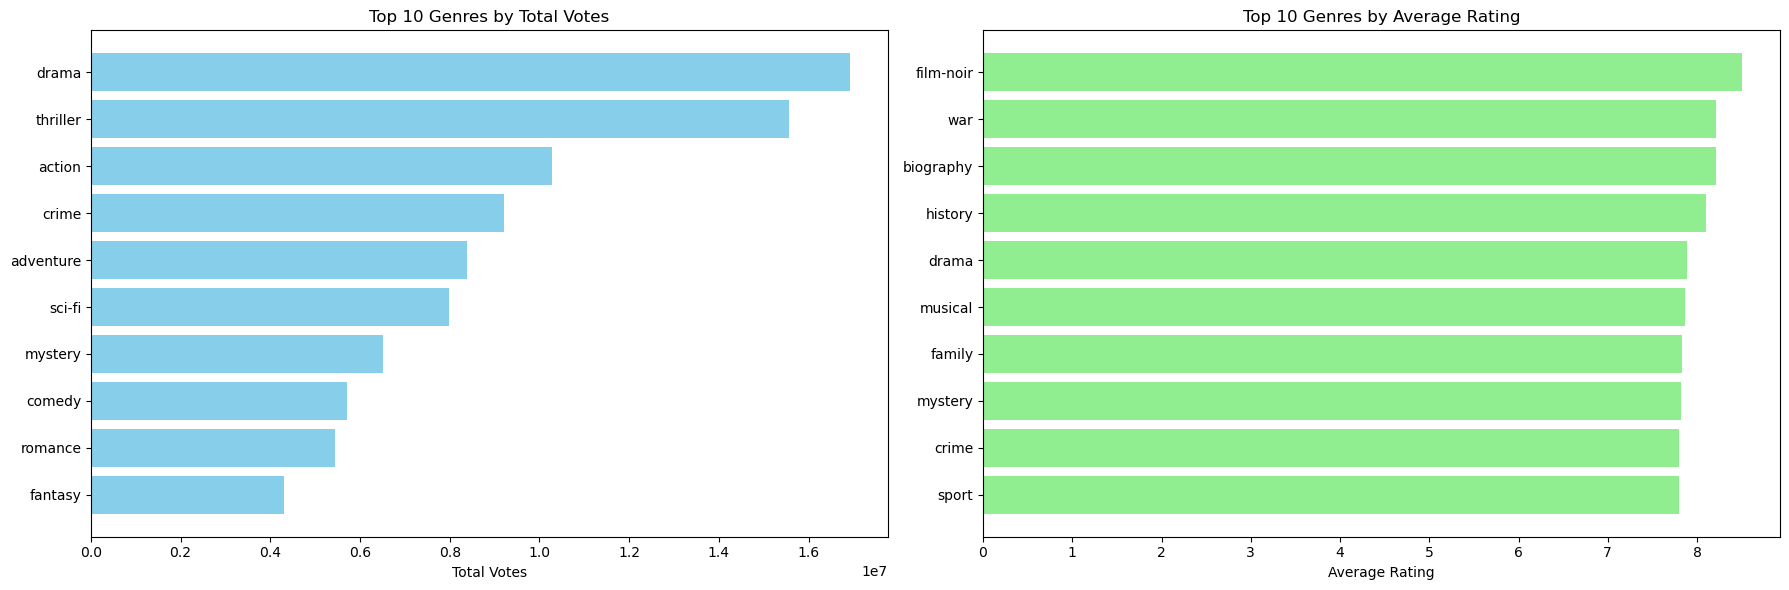

In [7]:
import pandas as pd

# Step 1: Parse movie_titles_metadata.txt 
movie_data = []

try:
    with open(movie_metadata_file, 'r', encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(' +++$+++ ')
            if len(parts) >= 6:  # Ensure there are at least 6 parts (ID, title, year, rating, votes, genres)
                movie_id = parts[0]
                title = parts[1]
                
                # Extract the numeric year (in case of additional information like '/I')
                year_str = parts[2]
                year = int(''.join(filter(str.isdigit, year_str)))  # Extract only digits
                
                rating = float(parts[3])
                votes = int(parts[4])
                genres = ast.literal_eval(parts[5])  # Convert string to list
                
                movie_data.append([movie_id, title, year, rating, votes, genres])

    # Create a DataFrame for metadata
    df = pd.DataFrame(movie_data, columns=['Movie ID', 'Title', 'Year', 'Rating', 'Votes', 'Genres'])

except OSError as e:
    print(f"Error opening file: {e}")
except ValueError as e:
    print(f"Error parsing line: {line} | {e}")

# Step 2: Aggregate votes and average ratings by genre
genre_votes = defaultdict(int)
genre_ratings = defaultdict(float)
genre_count = defaultdict(int)

for _, row in df.iterrows():
    votes = row['Votes']
    rating = row['Rating']
    genres = row['Genres']
    
    for genre in genres:
        genre_votes[genre] += votes
        genre_ratings[genre] += rating * votes  # Weighted rating (rating * votes)
        genre_count[genre] += 1

# Step 3: Calculate average ratings and aggregate total votes
average_ratings = {genre: genre_ratings[genre] / genre_votes[genre] if genre_votes[genre] > 0 else 0 
                   for genre in genre_ratings}

# Step 4: Sort genres based on total votes and average rating
sorted_by_votes = {genre: genre_votes[genre] for genre in sorted(genre_votes, key=genre_votes.get, reverse=True)}
sorted_by_rating = {genre: average_ratings[genre] for genre in sorted(average_ratings, key=average_ratings.get, reverse=True)}

# Step 5: Create a combined popularity score
popularity_score = {genre: genre_votes[genre] * average_ratings[genre] for genre in genre_votes}

# Sort genres by popularity score
sorted_by_popularity_score = {genre: popularity_score[genre] for genre in sorted(popularity_score, key=popularity_score.get, reverse=True)}

# Step 6: Visualize the top genres by total votes and average rating
top_genres_by_votes = list(sorted_by_votes.items())[:10]
top_genres_by_rating = list(sorted_by_rating.items())[:10]
top_genres_by_popularity = list(sorted_by_popularity_score.items())[:10]

# Plotting Total Votes and Average Ratings
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Total Votes
axes[0].barh([item[0] for item in top_genres_by_votes], [item[1] for item in top_genres_by_votes], color='skyblue')
axes[0].set_title('Top 10 Genres by Total Votes')
axes[0].set_xlabel('Total Votes')
axes[0].invert_yaxis()

# Average Ratings
axes[1].barh([item[0] for item in top_genres_by_rating], [item[1] for item in top_genres_by_rating], color='lightgreen')
axes[1].set_title('Top 10 Genres by Average Rating')
axes[1].set_xlabel('Average Rating')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


*Community exploration througout the Genres*

Number of communities detected: 284
Number of nodes (movies): 616
Number of edges (shared genres): 112603

Community sizes:
Community 0: 84 nodes
Community 25: 75 nodes
Community 3: 62 nodes
Community 135: 58 nodes
Community 277: 39 nodes
Community 103: 7 nodes
Community 4: 2 nodes
Community 7: 2 nodes
Community 8: 2 nodes
Community 17: 2 nodes
Community 21: 2 nodes
Community 24: 2 nodes
Community 26: 2 nodes
Community 28: 2 nodes
Community 34: 2 nodes
Community 37: 2 nodes
Community 39: 2 nodes
Community 91: 2 nodes
Community 104: 2 nodes
Community 1: 1 nodes
Community 2: 1 nodes
Community 5: 1 nodes
Community 6: 1 nodes
Community 9: 1 nodes
Community 10: 1 nodes
Community 11: 1 nodes
Community 12: 1 nodes
Community 13: 1 nodes
Community 14: 1 nodes
Community 15: 1 nodes
Community 16: 1 nodes
Community 18: 1 nodes
Community 19: 1 nodes
Community 20: 1 nodes
Community 22: 1 nodes
Community 23: 1 nodes
Community 27: 1 nodes
Community 29: 1 nodes
Community 30: 1 nodes
Community 31: 1 nod

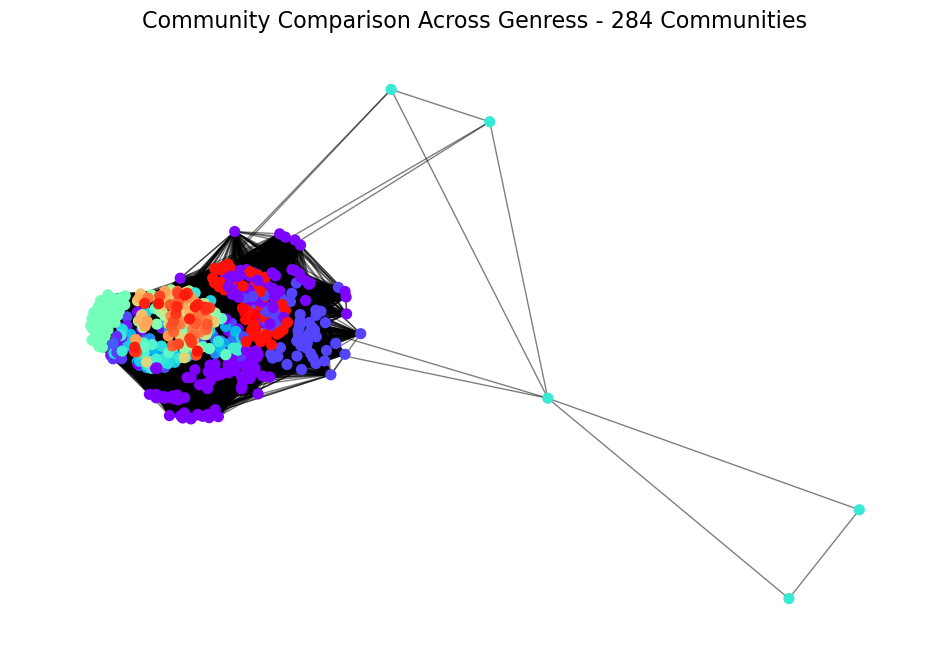

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import ast
from collections import defaultdict
from community import community_louvain  # Louvain method for community detection

# Step 1: Parse movie_titles_metadata.txt to get movie data
movie_data = []

try:
    with open(movie_metadata_file, 'r', encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(' +++$+++ ')
            if len(parts) >= 6:  # Ensure there are at least 6 parts (ID, title, year, rating, votes, genres)
                movie_id = parts[0]
                title = parts[1]
                
                # Extract the numeric year (in case of additional information like '/I')
                year_str = parts[2]
                year = int(''.join(filter(str.isdigit, year_str)))  # Extract only digits
                
                rating = float(parts[3])
                votes = int(parts[4])
                genres = ast.literal_eval(parts[5])  # Convert string to list
                
                movie_data.append([movie_id, title, year, rating, votes, genres])

    # Create a DataFrame for metadata
    df = pd.DataFrame(movie_data, columns=['Movie ID', 'Title', 'Year', 'Rating', 'Votes', 'Genres'])

except OSError as e:
    print(f"Error opening file: {e}")
except ValueError as e:
    print(f"Error parsing line: {line} | {e}")

# Step 2: Create a graph of movies and genres (nodes are movies, edges are shared genres)
G = nx.Graph()

# Add nodes and edges based on shared genres
for _, row in df.iterrows():
    movie_id = row['Movie ID']
    genres = row['Genres']
    for genre in genres:
        G.add_node(movie_id, genre=genre)  # Add movie node with genre as attribute
        for other_row in df.iterrows():
            other_movie_id = other_row[1]['Movie ID']
            other_genres = other_row[1]['Genres']
            if movie_id != other_movie_id and any(genre in other_genres for genre in genres):
                G.add_edge(movie_id, other_movie_id)

# Step 3: Run community detection using Louvain method with increased resolution
partition = community_louvain.best_partition(G, resolution=2.0)  # Increased resolution

# Step 4: Collect community information
num_communities = len(set(partition.values()))
community_sizes = defaultdict(int)
for community_id in partition.values():
    community_sizes[community_id] += 1

sample_nodes = defaultdict(list)
for movie_id, community_id in partition.items():
    sample_nodes[community_id].append(movie_id)

# Step 5: Print additional information
print(f"Number of communities detected: {num_communities}")
print(f"Number of nodes (movies): {len(G.nodes)}")
print(f"Number of edges (shared genres): {len(G.edges)}")

print("\nCommunity sizes:")
for community_id, size in sorted(community_sizes.items(), key=lambda x: x[1], reverse=True):
    print(f"Community {community_id}: {size} nodes")
    
# Step 6: Visualize the community comparison across genres using Force Atlas layout in Matplotlib
# Apply spring layout for force-directed graph visualization with fixed random seed
pos = nx.spring_layout(G, k=0.15, iterations=20, seed=42)  # Fixed seed for reproducibility

# Color the nodes based on their community
community_colors = [partition[node] for node in G.nodes]

# Plot the network with community coloring
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.rainbow, node_color=community_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title(f"Community Comparison Across Genress - {num_communities} Communities", fontsize=16)
plt.axis('off')
plt.show()


*Dialogue Complexity Over the years*

In [19]:
import re

def calculate_complexity(dialogue):
    # Split the dialogue into sentences based on punctuation marks (.!?)
    sentences = re.split(r'[.!?]', dialogue)
    
    # Calculate sentence lengths (number of words in each sentence)
    sentence_lengths = [len(re.findall(r'\w+', sentence)) for sentence in sentences]
    
    # Total word count is the sum of the sentence lengths
    total_words = sum(sentence_lengths)
    
    # Vocabulary diversity is the ratio of unique words to total words
    unique_words = len(set(re.findall(r'\w+', dialogue.lower())))
    vocab_diversity = unique_words / total_words if total_words > 0 else 0
    
    # Average sentence length is the mean of the sentence lengths
    avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0
    
    return avg_sentence_length, vocab_diversity, total_words


In [21]:
# Load movie metadata (Movie ID and Year)
movie_metadata_file = r"D:\archive\movie_titles_metadata.txt"
movie_metadata = []

try:
    with open(movie_metadata_file, 'r', encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(' +++$+++ ')
            if len(parts) >= 6:  # Movie ID, Title, Year, Rating, Votes, Genres
                movie_id = parts[0]
                # Clean the Year field (remove anything after the numeric part)
                year_str = parts[2]
                year = ''.join(filter(str.isdigit, year_str))  # Keep only digits from year string
                if year:  # Ensure we have a valid year
                    year = int(year)
                else:
                    year = None  # If no valid year, set it to None
                movie_metadata.append([movie_id, year])

    # Create a DataFrame for movie metadata
    movie_df = pd.DataFrame(movie_metadata, columns=['Movie ID', 'Year'])

except OSError as e:
    print(f"Error opening file: {e}")
except ValueError as e:
    print(f"Error parsing line: {line} | {e}")


In [23]:
dialogue_data = []
movie_lines_file = r"D:\archive\movie_lines.txt"

try:
    with open(movie_lines_file, 'r', encoding="ISO-8859-1") as f:
        for line in f:
            parts = line.strip().split(' +++$+++ ')
            if len(parts) == 5:  # Movie ID, Character, Dialogue
                line_id = parts[0]  # This is the line ID
                character = parts[1]
                dialogue = parts[4]
                movie_id = parts[2]  # Extract the Movie ID
                dialogue_data.append([line_id, movie_id, character, dialogue])

    # Create a DataFrame for dialogue data
    dialogue_df = pd.DataFrame(dialogue_data, columns=['Line ID', 'Movie ID', 'Character', 'Dialogue'])

except OSError as e:
    print(f"Error opening file: {e}")
except ValueError as e:
    print(f"Error parsing line: {line} | {e}")


In [25]:
# Merge movie metadata with dialogues based on Movie ID
movie_dialogue_df = pd.merge(dialogue_df, movie_df, on='Movie ID')


In [27]:
from collections import defaultdict

# Calculate complexity metrics for each movie
movie_complexity = defaultdict(list)

for _, row in movie_dialogue_df.iterrows():
    movie_id = row['Movie ID']
    dialogue = row['Dialogue']
    avg_sentence_length, vocab_diversity, total_words = calculate_complexity(dialogue)
    
    # Store complexity metrics for each movie
    movie_complexity[movie_id].append([avg_sentence_length, vocab_diversity, total_words])


In [29]:
# Aggregate the complexity metrics by movie
movie_complexity_df = pd.DataFrame({
    'Movie ID': list(movie_complexity.keys()),
    'Avg Sentence Length': [sum([x[0] for x in movie_complexity[movie_id]]) / len(movie_complexity[movie_id]) for movie_id in movie_complexity],
    'Vocab Diversity': [sum([x[1] for x in movie_complexity[movie_id]]) / len(movie_complexity[movie_id]) for movie_id in movie_complexity],
    'Total Word Count': [sum([x[2] for x in movie_complexity[movie_id]]) for movie_id in movie_complexity]
})


In [31]:
# Merge with movie metadata to get years
movie_complexity_df = pd.merge(movie_complexity_df, movie_df, on='Movie ID')


In [33]:
# Group by year and calculate the average complexity metrics for each year
yearly_complexity_df = movie_complexity_df.groupby('Year').agg({
    'Avg Sentence Length': 'mean',
    'Vocab Diversity': 'mean',
    'Total Word Count': 'mean'
}).reset_index()

# Show the result
print(yearly_complexity_df)


    Year  Avg Sentence Length  Vocab Diversity  Total Word Count
0   1927             3.230252         0.904779       1041.000000
1   1931             3.698530         0.940095       6347.500000
2   1932             3.407457         0.945361       5013.000000
3   1933             4.707527         0.935210       4835.500000
4   1934             3.911821         0.949242       8970.666667
..   ...                  ...              ...               ...
69  2006             3.596296         0.950712       4070.500000
70  2007             3.396730         0.958496       4188.400000
71  2008             4.449147         0.948226       4789.000000
72  2009             3.259263         0.950878       5148.750000
73  2010             3.942571         0.935312       8110.000000

[74 rows x 4 columns]


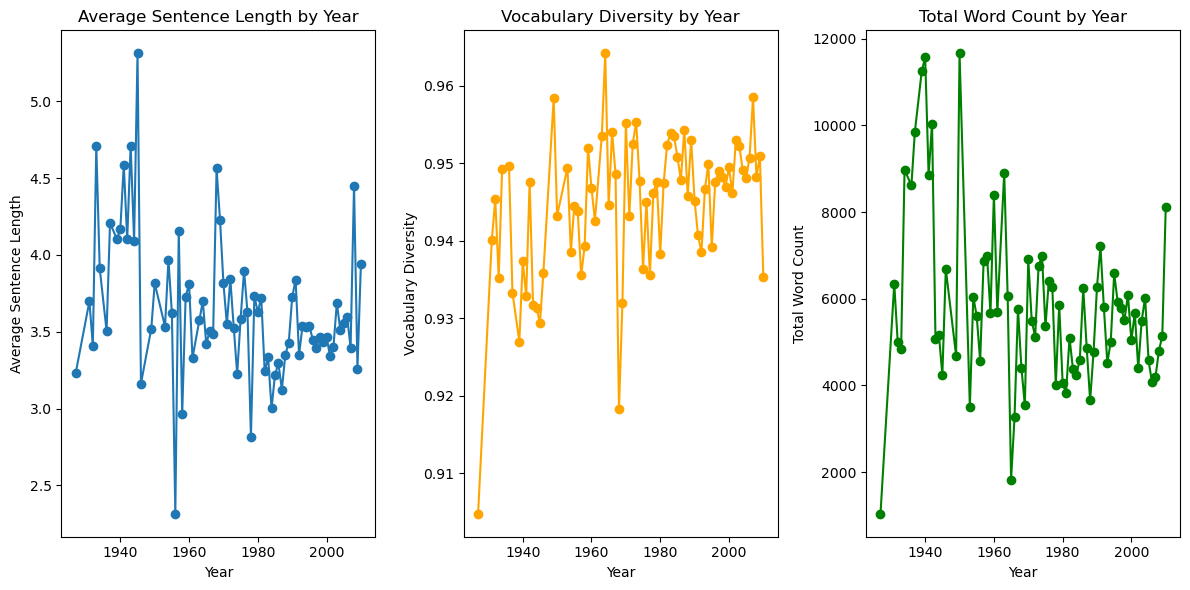

In [35]:
import matplotlib.pyplot as plt

# Plotting the complexity metrics over the years
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(yearly_complexity_df['Year'], yearly_complexity_df['Avg Sentence Length'], marker='o')
plt.title('Average Sentence Length by Year')
plt.xlabel('Year')
plt.ylabel('Average Sentence Length')

plt.subplot(1, 3, 2)
plt.plot(yearly_complexity_df['Year'], yearly_complexity_df['Vocab Diversity'], marker='o', color='orange')
plt.title('Vocabulary Diversity by Year')
plt.xlabel('Year')
plt.ylabel('Vocabulary Diversity')

plt.subplot(1, 3, 3)
plt.plot(yearly_complexity_df['Year'], yearly_complexity_df['Total Word Count'], marker='o', color='green')
plt.title('Total Word Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Word Count')

plt.tight_layout()
plt.show()
